<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 1s 0us/step


In [16]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [30]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
import requests
import tensorflow as tf
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

In [31]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

8982 train sequences
2246 test sequences


In [32]:
maxlen = 200
step = 3
batch_size = 46
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1


print('Pad Sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)

Pad Sequences (samples x time)
x_train shape:  (8982, 200)
x_test shape:  (2246, 200)


In [33]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,   24,
          4, 1222, 2771,    7,  227,  236,   40,   

In [34]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,097,153
Trainable params: 4,097,153
Non-trainable params: 0
_________________________________________________________________


In [35]:
unicorns = model.fit(X_train, y_train,
          batch_size=batch_size, 
          epochs=5, 
          validation_data=(X_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 88s 10ms/sample - loss: -186.6805 - accuracy: 0.0498 - val_loss: -298.4077 - val_accuracy: 0.0396
Epoch 2/5
8982/8982 [==============================] - 96s 11ms/sample - loss: -400.7600 - accuracy: 0.0499 - val_loss: -494.6432 - val_accuracy: 0.0396
Epoch 3/5
8982/8982 [==============================] - 92s 10ms/sample - loss: -599.3193 - accuracy: 0.0499 - val_loss: -689.4039 - val_accuracy: 0.0396
Epoch 4/5
8982/8982 [==============================] - 95s 11ms/sample - loss: -795.4618 - accuracy: 0.0499 - val_loss: -881.6776 - val_accuracy: 0.0396
Epoch 5/5
8982/8982 [==============================] - 98s 11ms/sample - loss: -990.3374 - accuracy: 0.0499 - val_loss: -1073.4838 - val_accuracy: 0.0396


In [37]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

2246/2246 [==============================] - 4s 2ms/sample - loss: -1073.4838 - accuracy: 0.0396
Test score: -1073.4837887255294
Test accuracy: 0.039626002


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

pad_sequences is used to ensure that all sequences in a list have the same length. Adds padding.



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Typically LSTM outperforms RNN, as it does a better job at avoiding the vanishing gradient problem, and can model longer dependences. LSTMs address this issue by adding forget/remember gates.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. Language translation
2. Sentiment analysis
3. Text generation

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [115]:
test_images = '*/frog_images/*.jpg/'
X_test = imread_collection(test_images)

In [165]:
import re

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from PIL import Image
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [113]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
import os
# TODO - your code!

In [157]:
images = imread_collection('./frog_images/*.jpg')
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [158]:
import os, sys
img_dir = "./frog_images"

#Load images to list
images = []
for i in os.listdir(img_dir):
    if os.path.isfile(os.path.join(img_dir, i)) and i[-3:] == 'jpg':
        images.append(i)

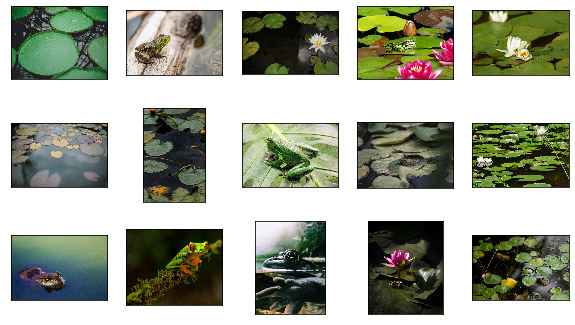

In [159]:
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread

img_list = [skimage.io.imread(f'./frog_images/{img}') for img in os.listdir(img_dir) if img[-3:] == 'jpg']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
plt.show()

In [166]:
resnet = ResNet50V2(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def img_path(I):
    return image.load_img(I, target_size=(224, 224))

def frog_img(Y):
    x = image.img_to_array(Y)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    print(results)
    for i in results:
        if i[1] in frogs:
            return 'Frog'
        else:
            pass
    return 'No frog'

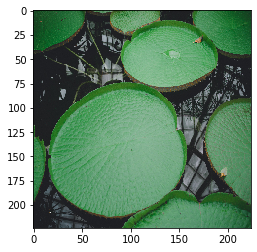

40960/35363 [==================================] - 0s 1us/step
[('n04258138', 'solar_dish', 0.26390082), ('n03249569', 'drum', 0.23506702), ('n03250847', 'drumstick', 0.050987396), ('n02877765', 'bottlecap', 0.04585889), ('n03920288', 'Petri_dish', 0.0412718)]
No frog



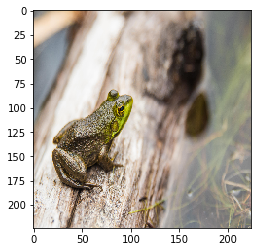

[('n01644900', 'tailed_frog', 0.6716922), ('n01644373', 'tree_frog', 0.27439088), ('n01641577', 'bullfrog', 0.0480947), ('n01695060', 'Komodo_dragon', 0.0019305993), ('n01687978', 'agama', 0.0016584452)]
Frog



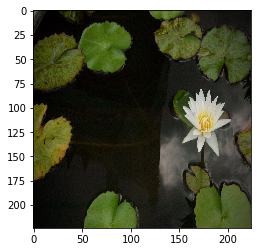

[('n04476259', 'tray', 0.34925094), ('n11939491', 'daisy', 0.29559806), ('n03485794', 'handkerchief', 0.09576834), ('n02840245', 'binder', 0.07851932), ('n03938244', 'pillow', 0.02560789)]
No frog



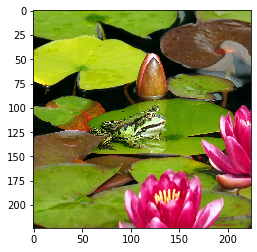

[('n02190166', 'fly', 0.99265677), ('n02206856', 'bee', 0.004689323), ('n02256656', 'cicada', 0.0009596485), ('n02259212', 'leafhopper', 0.00061767944), ('n02236044', 'mantis', 0.00021234999)]
No frog



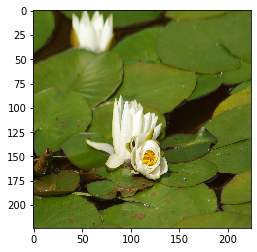

[('n01944390', 'snail', 0.8160978), ('n02280649', 'cabbage_butterfly', 0.027272198), ('n01737021', 'water_snake', 0.022942267), ('n11939491', 'daisy', 0.022666734), ('n01943899', 'conch', 0.017790994)]
No frog



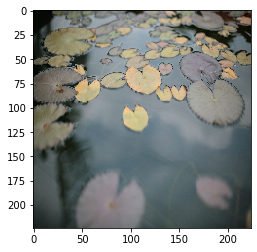

[('n04033995', 'quilt', 0.27399695), ('n11939491', 'daisy', 0.17837009), ('n04209239', 'shower_curtain', 0.071577266), ('n03938244', 'pillow', 0.0488047), ('n03930313', 'picket_fence', 0.039503567)]
No frog



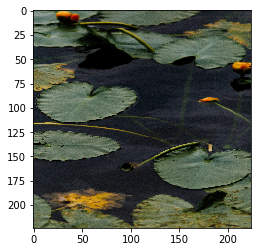

[('n12620546', 'hip', 0.38287064), ('n12267677', 'acorn', 0.10583437), ('n01737021', 'water_snake', 0.061508328), ('n02017213', 'European_gallinule', 0.06025636), ('n03598930', 'jigsaw_puzzle', 0.04829946)]
No frog



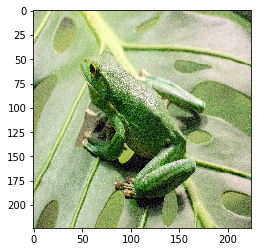

[('n01644373', 'tree_frog', 0.95609474), ('n01644900', 'tailed_frog', 0.04311674), ('n01641577', 'bullfrog', 0.00076296367), ('n02226429', 'grasshopper', 1.0363863e-05), ('n02236044', 'mantis', 3.2019523e-06)]
Frog



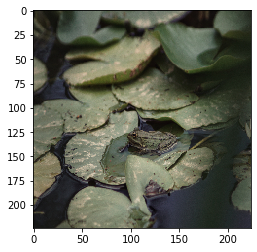

[('n01737021', 'water_snake', 0.30643952), ('n01945685', 'slug', 0.07309957), ('n13044778', 'earthstar', 0.071998805), ('n12267677', 'acorn', 0.059538815), ('n01729322', 'hognose_snake', 0.05729547)]
No frog



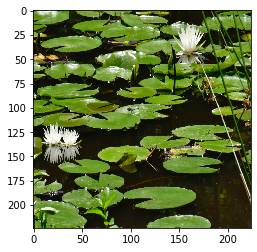

[('n11939491', 'daisy', 0.8145672), ('n03598930', 'jigsaw_puzzle', 0.089548275), ('n03457902', 'greenhouse', 0.0077825226), ('n04355338', 'sundial', 0.0067283846), ('n04326547', 'stone_wall', 0.0065645976)]
No frog



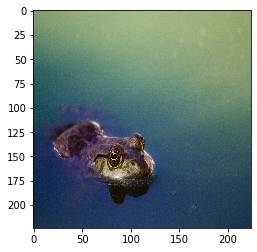

[('n01641577', 'bullfrog', 0.72787875), ('n02655020', 'puffer', 0.1746799), ('n02398521', 'hippopotamus', 0.043149266), ('n01644900', 'tailed_frog', 0.04128971), ('n01698640', 'American_alligator', 0.010093122)]
Frog



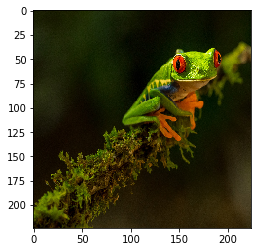

[('n01644373', 'tree_frog', 0.99616796), ('n01693334', 'green_lizard', 0.002010355), ('n01644900', 'tailed_frog', 0.0013048052), ('n01694178', 'African_chameleon', 0.00022511333), ('n01641577', 'bullfrog', 0.00013091057)]
Frog



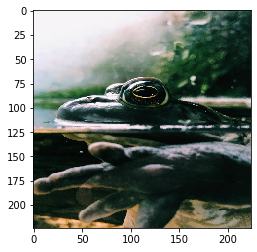

[('n01641577', 'bullfrog', 0.9959915), ('n02655020', 'puffer', 0.0024455725), ('n01667778', 'terrapin', 0.0010096476), ('n01644900', 'tailed_frog', 0.00030852272), ('n02643566', 'lionfish', 8.515738e-05)]
Frog



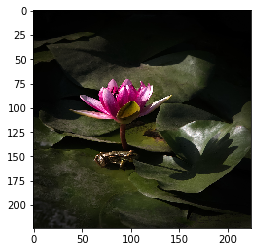

[('n03991062', 'pot', 0.43382165), ('n04522168', 'vase', 0.18519486), ('n07745940', 'strawberry', 0.08433453), ('n07614500', 'ice_cream', 0.025083844), ('n02206856', 'bee', 0.024161877)]
No frog



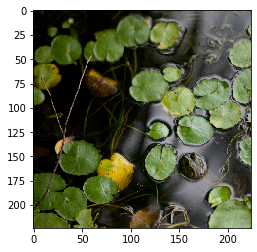

[('n03991062', 'pot', 0.4787556), ('n03697007', 'lumbermill', 0.0732946), ('n07734744', 'mushroom', 0.056395944), ('n13054560', 'bolete', 0.055833664), ('n13052670', 'hen-of-the-woods', 0.05138767)]
No frog



In [167]:
path = './frog_images/'

paths = os.listdir(path)

for file in paths:
    img = img_path(path+file)
    plt.imshow(img)
    plt.show()
    prediction = frog_img(img)
    print(prediction)
    print()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Data Analisis but I want to focus more on Machine Learning, Neural Networks, Deep learning, and AI.
- What area of Data Science would you most like to learn more about, and why?

AI/AGI. They are and will be revolutionary technologies for humankind. I want to be involved as to help guide it in the right direction if possible.
- Where do you think Data Science will be in 5 years?

It will be all be based on data and and there will be better outcomes for this instance in all aspects of business, government and financial decisions.
- What are the threats posed by AI to our society?

AI can be programmed to cause harm to people. Another thing is that, AI can be programmed to benefit people but finds destructive methods of achieving it. It will all depend on who makes decisions to controll AI, and it's on them if they want to cause harm to people and be threats to society.
- How do you think we can counteract those threats? 

We will encounter threats as we experience more with AI but hopefully we can identify those future threats, lay AI in more responsible hands and prevent people to have access to military weaponrly and other sensitive information that can put in danger people's lives.
- Do you think achieving General Artifical Intelligence is ever possible?

I think it is possible, but to predict when, is not up to me. It will take a team, vast research and experimentation.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [40]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")